In [1]:
#https://dev.to/ashwanirathee/dijkstras-algorithm-in-julia-46ih
#https://juliagraphs.org/Graphs.jl/dev/

# load needed package firstly

using Graphs #note: Graphs.jl is a reboot of the LightGraphs package which was archived
using SimpleWeightedGraphs
using GraphPlot


In [2]:
mutable struct LocatedGraph
    graph::SimpleWeightedGraph
    locations::Matrix{Float64}
end

In [3]:
V =  zeros(5,2)
V[1,:] = [1,1]
V[2,:] = [2,1]
V[3,:] = [3,3]
V[4,:] = [4,5]
V[5,:] = [5,5]

E = zeros(7,2)
E[1,:] = [1,2]
E[2,:] = [2,4]
E[3,:] = [4,1]
E[4,:] = [4,5]
E[5,:] = [2,5]
E[6,:] = [3,5]
E[7,:] = [3,4]

W = [1.5,2.5,2.6,2.3,2.4,3.0,4.0]


#create graph
g = SimpleWeightedGraph(size(V,1))
for i in 1:length(W)
    add_edge!(g, E[i,1], E[i,2], W[i])
end

lg = LocatedGraph(g,V)

LocatedGraph({5, 7} undirected simple Int64 graph with Float64 weights, [1.0 1.0; 2.0 1.0; … ; 4.0 5.0; 5.0 5.0])

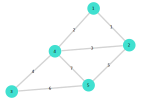

In [7]:
edgelabel = 1:ne(lg.graph)
nodelabel = 1:nv(lg.graph)
gplot(lg.graph, edgelabel=edgelabel, nodelabel=nodelabel)

In [8]:
function Dijkstra(G, s, τ)
    #openSet - the set of vertices that are at the frontier of the tree, and we think we should expand
    #a vertex belongs to a set iff set[j]=true
    openSet = false * ones(1,ne(G))
    openSet[s]  = true
    #set all labels to inf except where we started
    g = Inf*ones(1,ne(G)) 
    g[s] = 0
    #initalize parent array. parent[i] = j
    parent = zeros(1,ne(G)) 

    while ~empty(openSet)
        #i = vertex in openSet with lowest g[i]
        i = argmin(g .+ Inf.*.!(openSet))  #add inf to every label not in openSet and then argmin

        openSet[i] = false  #remove i from openSet and add it to expandedSet
        #for children j of vertex i:
            #if there is a better way to reach j, update g[j], and add to openSet as it might be worth traveling through
        for j in all_neighbors(g,i) 
            c_ij = g.weights[i,j]
            if g[i] + c_ij < g[j] && g[i]+c_ij < g[τ] #note: this will disqualify backtracking in the tree, so its ok we use all_neighbors
                g[j] = g[i] + c_ij
                parent[j] = i
                if j != τ
                    openSet[j] = true
                end
            end
        end
    end

    #find shortestpath by backtracking from τ to s
    shortestpath = τ
    while shortestpath[end] != 0 #parent[s] == 0 by construction
        append!(shortestpath,parent[shortestpath[end]])
    end
    return fliplr(shortestpath)
end

Dijkstra (generic function with 1 method)

In [57]:
type(lg.g)

LoadError: UndefVarError: type not defined

In [19]:
a = [1,2,3,4]
flip(a)

LoadError: UndefVarError: flip not defined

In [37]:
view(d,i)

2-element view(::Vector{Int64}, [1, 2]) with eltype Int64:
 1
 5

In [9]:
Inf(2,1)

LoadError: MethodError: objects of type Float64 are not callable
Maybe you forgot to use an operator such as [36m*, ^, %, / etc. [39m?

In [18]:
G = erdos_renyi(100, 0.0012, is_directed=true)
WG = SimpleWeightedGraph(G)
weights = WG.weights
adj = adjacency_matrix(WG)

LoadError: UndefVarError: SimpleWeightedGraph not defined

In [22]:
all_neighbors(g, 2)

2-element Vector{Int64}:
 1
 3

In [21]:
using LightGraphs
using GraphPlot

G₁ = Graph(3) # graph with 3 vertices

# make a triangle
add_edge!(G₁, 1, 2)
add_edge!(G₁, 1, 3)
add_edge!(G₁, 2, 3)


true

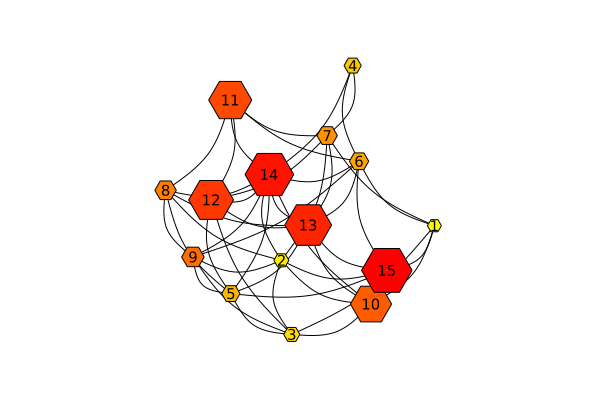

In [15]:
using GraphRecipes
using Plots

const n = 15
const A = Float64[ rand() < 0.5 ? 0 : rand() for i=1:n, j=1:n]
for i=1:n
    A[i, 1:i-1] = A[1:i-1, i]
    A[i, i] = 0
end

graphplot(A,
          markersize = 0.2,
          node_weights = 1:n,
          markercolor = range(colorant"yellow", stop=colorant"red", length=n),
          names = 1:n,
          fontsize = 10,
          linecolor = :darkgrey
          )